In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
from datetime import datetime

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [30]:
import scipy.stats as stats


In [2]:
claims=pd.read_csv("C:/Users/hp/OneDrive/Data Analytix/Python/Case Studies/Python Foundation Case Study 3 - Insurance Claims Case Study (1)/claims.csv")
cust=pd.read_csv("C:/Users/hp/OneDrive/Data Analytix/Python/Case Studies/Python Foundation Case Study 3 - Insurance Claims Case Study (1)/cust_demographics.csv")

In [3]:
#Q1: Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view ofthe data. Use the same for the subsequent questions.
cust_claims= pd.merge(left=cust, right=claims, left_on='CUST_ID',right_on='customer_id',how='left')
cust_claims

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1088,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1089,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1090,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


In [11]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 1091
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1092 non-null   int64         
 1   gender               1092 non-null   object        
 2   DateOfBirth          1092 non-null   datetime64[ns]
 3   State                1092 non-null   object        
 4   Contact              1092 non-null   float32       
 5   Segment              1092 non-null   object        
 6   claim_id             1085 non-null   float64       
 7   customer_id          1085 non-null   float64       
 8   incident_cause       1085 non-null   object        
 9   claim_date           1085 non-null   datetime64[ns]
 10  claim_area           1085 non-null   object        
 11  police_report        1085 non-null   object        
 12  claim_type           1085 non-null   object        
 13  claim_amount         1020 non-nul

In [4]:
#Q2: Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and theirbusiness significance.
cust_claims['DateOfBirth']=pd.to_datetime(cust_claims.DateOfBirth, format= "%d-%b-%y")

cust_claims['claim_date']=pd.to_datetime(cust_claims.claim_date, format= "%m/%d/%Y")
cust_claims["Contact"] = pd.to_numeric(cust_claims.Contact.str.replace("-",""),downcast='float')



In [5]:
#Q3: Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.
cust_claims["claim_amount"] = pd.to_numeric(cust_claims.claim_amount.str.replace("$",""),downcast='float')

C:\Users\hp\AppData\Local\Temp\ipykernel_2672\3236260568.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_claims["claim_amount"] = pd.to_numeric(cust_claims.claim_amount.str.replace("$",""),downcast='float')


In [6]:
#Q4: Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

def func(x):
    if x=='Yes':
        return '1'
    elif x=='No':
        return '0'
    return 'NA'

cust_claims['flag']=cust_claims['police_report'].apply(func)    



In [7]:
#Q5: One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.

cust_claims=cust_claims.groupby(by='CUST_ID').first().reset_index(drop=True)

In [63]:
cust_claims.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,claim_month,Year,Age_Group
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,154557.0,Driver error,2018-04-10,Auto,No,Injury only,12470.0,1.0,Yes,0,40,April,2018.0,Adult
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,263204.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,0,45,April,2018.0,Adult
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,287476.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,NA,29,October,2017.0,Youth
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,441097.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,1,47,March,2018.0,Adult
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,524545.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,0,38,July,2018.0,Adult


In [16]:
#Q6
cust_claims.isna().sum()

gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               7
customer_id            7
incident_cause         7
claim_date             7
claim_area             7
police_report          0
claim_type             7
claim_amount           0
total_policy_claims    0
fraudulent             7
flag                   0
Age                    7
dtype: int64

In [23]:
#Q6: Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

cust_claims['police_report'].fillna(cust_claims['police_report'].mode()[0],inplace=True)
cust_claims['claim_amount'].fillna(int(cust_claims['claim_amount'].mean()),inplace=True)
cust_claims['total_policy_claims'].fillna(int(cust_claims['total_policy_claims'].mean()),inplace=True)
cust_claims['incident_cause'].fillna(cust_claims['incident_cause'].mode()[0],inplace=True)


In [18]:
cust_claims.isna().sum()

gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               7
customer_id            7
incident_cause         7
claim_date             7
claim_area             7
police_report          0
claim_type             7
claim_amount           0
total_policy_claims    0
fraudulent             7
flag                   0
dtype: int64

In [62]:
#Q7
cust_claims["Age"] = round((cust_claims.claim_date - cust_claims.DateOfBirth).apply(lambda x: x.days)/365.25, 0)
cust_claims['Age'] = cust_claims['Age'].fillna(0).astype(int)


cust_claims['Age_Group']=np.where(cust_claims.Age<18, 'Children',
                                 (np.where(cust_claims.Age<30, 'Youth',
                                          np.where(cust_claims.Age<60, 'Adult',
                                                  np.where(cust_claims.Age>60, 'Senior','None')))))

In [10]:
#Q8
cust_claims.head()

cust_claims.groupby('Segment')['claim_amount'].mean()

Segment
Gold        12755.679688
Platinum    12370.114258
Silver      12271.119141
Name: claim_amount, dtype: float32

In [11]:
#Q9
cust_claims.loc[cust_claims.claim_date < '2018-09-10',:].groupby('incident_cause')['claim_amount'].sum()

incident_cause
Crime                  724460.0
Driver error          3264280.0
Natural causes        1312701.5
Other causes          3725029.0
Other driver error    3318800.0
Name: claim_amount, dtype: float32

In [12]:
#Q10
cust_claims.loc[(cust_claims.incident_cause.str.contains("driver") | cust_claims.incident_cause.str.contains("Driver")
                & ((cust_claims.State == 'TX') | (cust_claims.State == 'DE') | (cust_claims.State == 'AK'))),:].groupby(by = 'State')['State'].count()


State
AK    10
AL     8
AR     8
AZ     5
CA     4
CO     7
CT     7
DE    15
FL     7
GA     7
HI     2
IA     5
ID     3
IL     5
IN     9
KS     4
KY     5
LA     3
MA     4
MD     7
ME     5
MI     2
MN     5
MO     4
MS     3
MT     8
NC     5
ND     4
NE     9
NH     4
NJ     5
NM     2
NV     2
NY     6
OH     8
OK     1
OR     6
PA     4
RI     3
SC     4
SD     2
TN     5
TX    10
UT     4
VT     3
WA     4
WI     8
WV    12
WY     4
Name: State, dtype: int64

array([<AxesSubplot:ylabel='Female'>, <AxesSubplot:ylabel='Male'>],
      dtype=object)

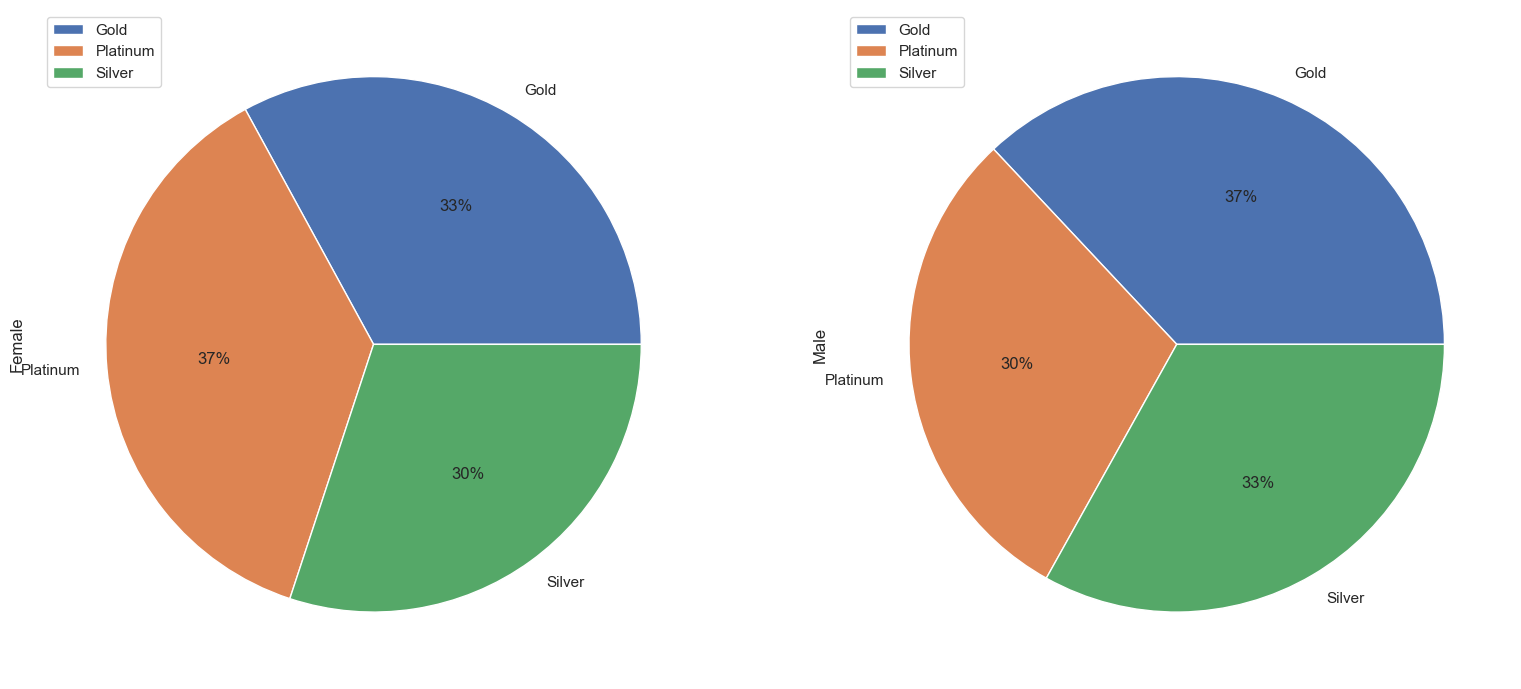

In [13]:
#Q11
gen_seg=pd.DataFrame(cust_claims.groupby(['gender','Segment'])['claim_amount'].sum().reset_index(name='amount'))
gen_seg_plot=gen_seg.pivot(index = "Segment", columns = "gender", values = "amount")
gen_seg_plot
gen_seg_plot.plot(kind='pie',subplots=True,figsize=(19,9),autopct='%1.0f%%')


<AxesSubplot:xlabel='gender', ylabel='Countof'>

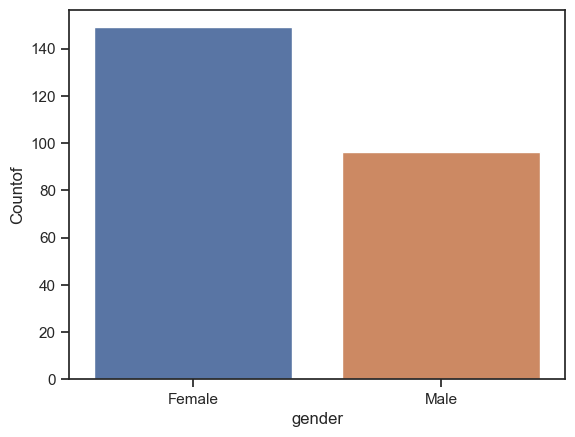

In [24]:
#Q12:
#cust_claims.loc[cust_claims.claim_date < '2018-09-10',:].groupby('incident_cause')['claim_amount'].sum()
x=cust_claims.loc[(cust_claims.incident_cause.str.contains("driver"))].groupby('gender')['gender'].count().reset_index(name='Countof')
                 
sns.barplot(x='gender',y='Countof',data=x)


<AxesSubplot:xlabel='Age_Group', ylabel='fraudulent'>

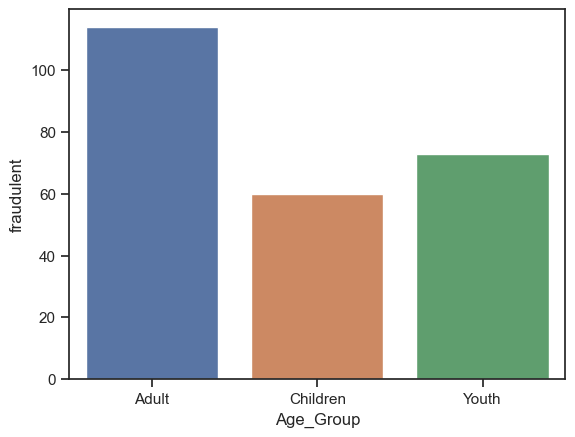

In [81]:
#Q13
cust_claims.head()

#AgeGroup_frauds
Age_Frauds=cust_claims.loc[(cust_claims.fraudulent=='Yes')]
Age_Frauds_plot=Age_Frauds.groupby(["Age_Group"])["fraudulent"].count().reset_index()
sns.barplot(x="Age_Group",y="fraudulent",data=Age_Frauds_plot)

<AxesSubplot:xlabel='claim_month'>

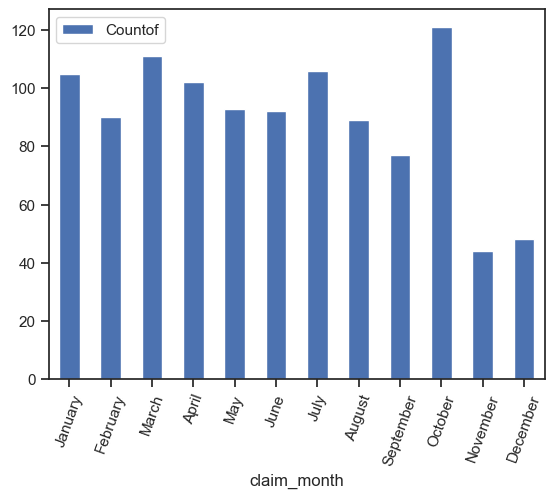

In [25]:
#Q14
#cust_claims['claim_month']=cust_claims['claim_date'].dt.month
cust_claims['claim_month']=pd.DatetimeIndex(cust_claims['claim_date']).month_name()
#cust_claims.claim_month=int(cust_claims.claim_month)
mon_claim=cust_claims.groupby('claim_month')['claim_id'].count().reset_index(name='Countof')
months_dic={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
mon_claim.sort_values('claim_month', key = lambda x : x.apply (lambda x : months_dic[x]),inplace=True)
mon_claim
mon_claim.plot.bar(x="claim_month",y='Countof',rot=70)


array([<AxesSubplot:title={'center':'claim_amount_x'}, xlabel='gender,Age_Group'>,
       <AxesSubplot:title={'center':'claim_amount_y'}, xlabel='gender,Age_Group'>],
      dtype=object)

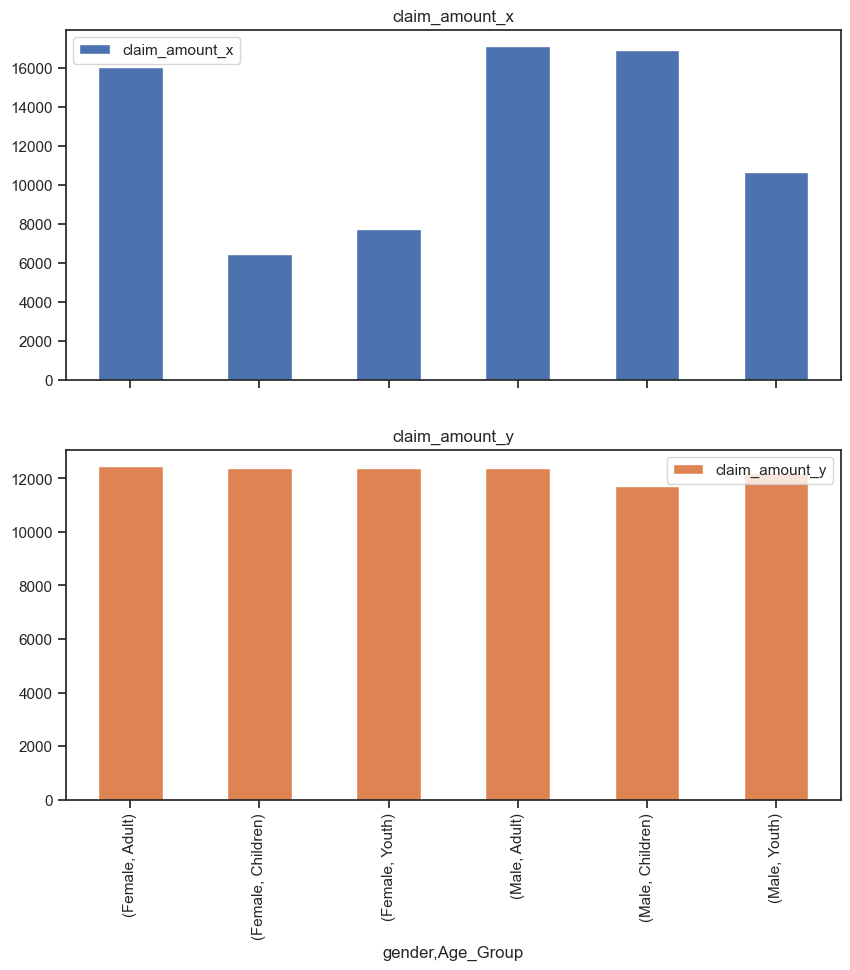

In [87]:
#Q15
fraud_gender_age=cust_claims.loc[(cust_claims.fraudulent=='Yes')].groupby(['gender','Age_Group'])['claim_amount'].mean()
non_fraud_gender_age=cust_claims.loc[(cust_claims.fraudulent=='No')].groupby(['gender','Age_Group'])['claim_amount'].mean()

claims_age_gender=round(pd.merge(fraud_gender_age,non_fraud_gender_age, on=["gender","Age_Group"]),2)
claims_age_gender.plot(kind="bar", subplots= True, legend= True,figsize=(10,10))


In [33]:
#Q16
claim_male = cust_claims['claim_amount'].loc[cust_claims['gender']=="Male"]
claim_female = cust_claims['claim_amount'].loc[cust_claims['gender']=="Female"]
claim_male.mean()
claim_female.mean()
#we will conduct a two sample t test with both equal and unequal vaiance
eq_var = stats.ttest_ind(a= claim_male,b= claim_female,equal_var=True)

uneq_var = stats.ttest_ind(a= claim_male,b= claim_female,equal_var=False)

In [34]:
eq_var.statistic

0.8848170602516858

In [35]:
uneq_var.statistic

0.8854179438774149

In [36]:
#as both t scores are almost equal, we assume equal variance
a=eq_var.statistic
b=eq_var.pvalue

In [37]:
a

0.8848170602516858

In [38]:
b

0.37645170410763473

In [ ]:
#As the value of t test is greater than 0.05, there is a similarity in amount claimed by males and females.

In [93]:
#Q17
#H0: there is no significant relationship between category and segment
#Ha: there is a significant relationship between categry and segment

#we will perform a chi square test
age_cat=pd.crosstab(cust_claims.Age_Group, cust_claims.Segment, margins = True)
chi_test=stats.chi2_contingency(observed= age_cat)
chi_test[1]
#since the significance values is more than 0.05, we fail to reject the null hypothesis and there is no significant relationship between category and segment

0.9630831069084891

In [47]:
#Q18
#H0: No significant relationship between 2016-17 claim amounts and current claim amounts
#Ha: There is a significant relationship between 2016-17 and current claims
# we will use person coefficient test
cust_claims["Year"]= cust_claims['claim_date'].dt.year

curr_yr= cust_claims.loc[cust_claims.Year == 2018]["claim_amount"]
amt_2016_17= cust_claims.loc[cust_claims.Year==2017]["claim_amount"]
stats.pearsonr(curr_yr,amt_2016_17)


ValueError: x and y must have the same length.

In [98]:
#Q19
#H0: No significant difference between age groups and insurance claims or No influence of age groups on insurance claims
#Ha: There is significant difference between age groups and insurance claims or there is some influence of age groups on insurance claims

#we will perform Anova Test

age_group_youth = cust_claims['total_policy_claims'].loc[cust_claims['Age_Group']=="Youth"]
age_group_adult = cust_claims['total_policy_claims'].loc[cust_claims['Age_Group']=="Adult"]
anova = stats.f_oneway(age_group_youth,age_group_adult)
anova.pvalue
anova.statistic
#since the p value is greater then 0.05, we fail to reject the null hypothesis

0.5905445860775921

In [51]:
#Q20
cust_claims['total_policy_claims'] = pd.to_numeric(cust_claims['total_policy_claims'])
#correlatio
cust_claims.total_policy_claims.corr(other= cust_claims.claim_amount)

# As the correlation is negative the number of policy claims in inversely propotional to the claimed amount.st

-0.014788414910264487